In [103]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df_suv = pd.read_csv("listings_suv.csv")
df_cars = pd.read_csv("listings.csv")
df_cars = df_cars[df_cars['Yakıt Tipi'] != 'Elektrik']
df_suv = df_suv[df_suv['Yakıt Tipi'] != 'Elektrik']
df = pd.concat([df_suv, df_cars], ignore_index=True)
df = df.iloc[:, :22]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [104]:
def apply_(s):
    if pd.isna(s):
        return
    else:
        try:
            if "-" in s:
                s = s.replace("cm3", "").replace(" ", "")
                return statistics.mean([int(a) for a in s.split("-")])
            else:
                return int(s.replace("cc", "").replace(" ", ""))
        except:
            return


def apply_2(s):
    if pd.isna(s):
        return
    else:
        try:
            if "-" in s:
                s = s.replace("HP", "").replace(" ", "")
                return statistics.mean([int(a) for a in s.split("-")])
            else:
                return int(s.replace("hp", "").replace(" ", ""))
        except:
            return


def apply_1(s):
    if not s:
        return
    else:
        return int(s.split("TL")[0].replace(" TL", "").replace(".", ""))


def apply_3(s):
    if pd.isna(s):
        return
    else:
        return float(s.replace(" lt", "").replace(",", "."))


def apply_4(s):
    if pd.isna(s):
        return
    else:
        return float(s.replace(" km", "").replace(".", ""))



def apply_5(s):
    if pd.isna(s):
        return None,None
    else:
        if "Belirtilmemiş" in s:
            return None,None
        elif "Tamamı orjinal" in s:
            return 0,0
        elif "Tamamı boyalı" in s:
            return 12,0
        else:
            t = s.split(", ")
            o = 0
            p = 0
            for a in t:
                if "değişen" in a:
                    o = int(a.replace(" değişen",""))
                elif "boyalı" in a:
                    p = int(a.replace(" boyalı",""))
            return p,o


def apply_6(s):
    if pd.isna(s):
        return False
    else:
        if "Agir hasarli" in s:
            return True
        else:
            return False

In [105]:
df["Fiyat"] = df["Fiyat"].apply(apply_1)
df["Kilometre"] = df["Kilometre"].apply(apply_4)
df["Motor Hacmi"] = df["Motor Hacmi"].apply(apply_)
df["Motor Gücü"] = df["Motor Gücü"].apply(apply_2)
df["Ort. Yakıt Tüketimi"] = df["Ort. Yakıt Tüketimi"].apply(apply_3)
df["Agir Hasarli"] = df["tramer"].apply(apply_6)
df[['Boya', 'Değişen']] = df['Boya-değişen'].apply(apply_5).apply(pd.Series)
df.drop(["Yakıt Deposu","İlan Tarihi","Takasa Uygun","Boya-değişen"], axis=1, inplace=True)

df.head()

,İlan No,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,...,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Kimden,tramer,Fiyat,Agir Hasarli,Boya,Değişen
0,25143588,Chevrolet,Captiva,2.0 D LT High,2010,74000.00,Otomatik,Dizel,Crossover,Siyah,...,150.00,4WD (Sürekli),İkinci El,8.70,Galeriden,NaN,810000,False,2.00,0.00
1,23753909,Audi,Q5,2.0 TDI Quattro,2010,258000.00,Yarı Otomatik,Dizel,Crossover,Beyaz,...,170.00,4WD (Sürekli),NaN,6.70,Galeriden,NaN,1180000,False,0.00,0.00
2,24704185,Opel,Antara,2.0 CDTI Enjoy,2010,253000.00,Otomatik,Dizel,Crossover,Beyaz,...,150.00,4WD (Sürekli),İkinci El,8.60,Galeriden,NaN,620000,False,0.00,1.00
3,25278122,Volkswagen,Tiguan,1.4 TSI Sport&Style,2010,176000.00,Düz,Benzin,Crossover,Beyaz,...,150.00,Önden Çekiş,İkinci El,6.70,Sahibinden,NaN,700000,False,1.00,2.00
4,24135016,Nissan,Qashqai,1.6 Visia,2010,118750.00,Düz,Benzin,Crossover,Siyah,...,115.00,Önden Çekiş,İkinci El,6.70,Sahibinden,NaN,615000,False,4.00,0.00


In [106]:
df.describe()

,İlan No,Yıl,Kilometre,Motor Hacmi,Motor Gücü,Ort. Yakıt Tüketimi,Fiyat,Boya,Değişen
count,40619.00,40619.00,40618.00,39865.00,39866.00,36347.00,40619.00,25943.00,25943.00
mean,24804903.00,2016.23,131544.61,1518.93,121.09,5.26,1101657.66,1.63,0.46
std,878848.66,3.95,314400.51,362.54,45.83,1.27,3125114.77,2.24,0.86
min,8358185.00,2010.00,0.00,875.00,55.00,1.20,24000.00,0.00,0.00
25%,24726569.00,2013.00,62147.50,1368.00,95.00,4.20,622000.00,0.00,0.00
50%,25101124.00,2016.00,122000.00,1497.00,112.00,5.00,799750.00,1.00,0.00
75%,25200828.50,2020.00,184000.00,1598.00,135.00,6.10,1117250.00,3.00,1.00
max,25281289.00,2024.00,56500000.00,6750.00,1250.00,20.00,460000000.00,12.00,9.00


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40619 entries, 0 to 40618
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan No              40619 non-null  int64  
 1   Marka                40619 non-null  object 
 2   Seri                 40619 non-null  object 
 3   Model                40607 non-null  object 
 4   Yıl                  40619 non-null  int64  
 5   Kilometre            40618 non-null  float64
 6   Vites Tipi           40619 non-null  object 
 7   Yakıt Tipi           40618 non-null  object 
 8   Kasa Tipi            40611 non-null  object 
 9   Renk                 40605 non-null  object 
 10  Motor Hacmi          39865 non-null  float64
 11  Motor Gücü           39866 non-null  float64
 12  Çekiş                40173 non-null  object 
 13  Araç Durumu          38794 non-null  object 
 14  Ort. Yakıt Tüketimi  36347 non-null  float64
 15  Kimden               40619 non-null 

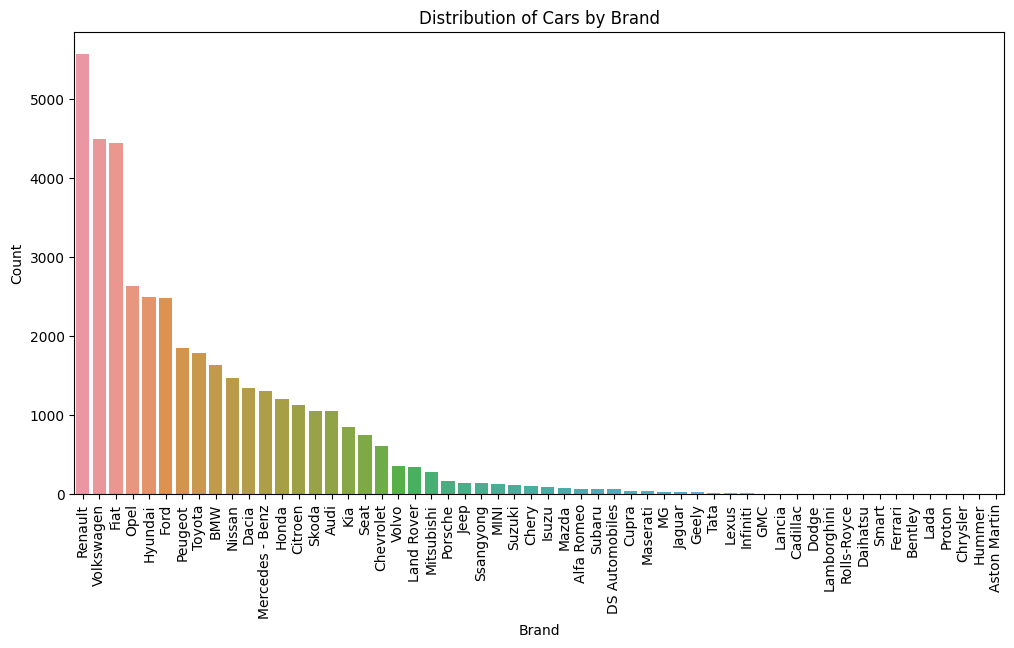

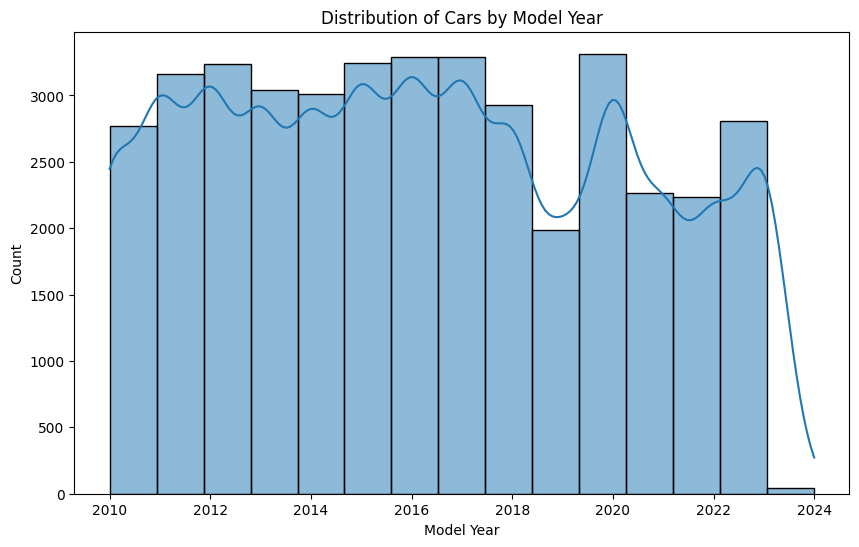

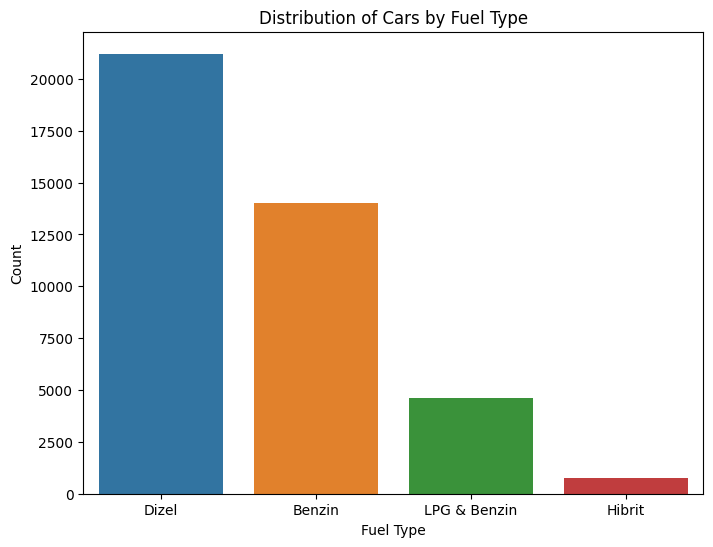

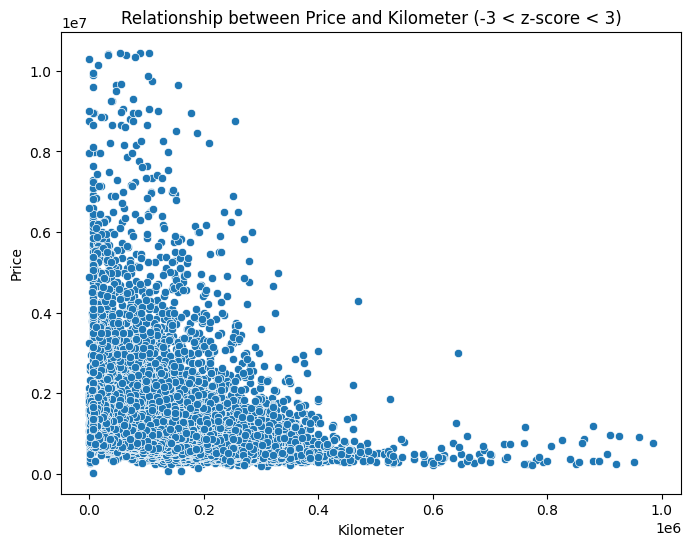

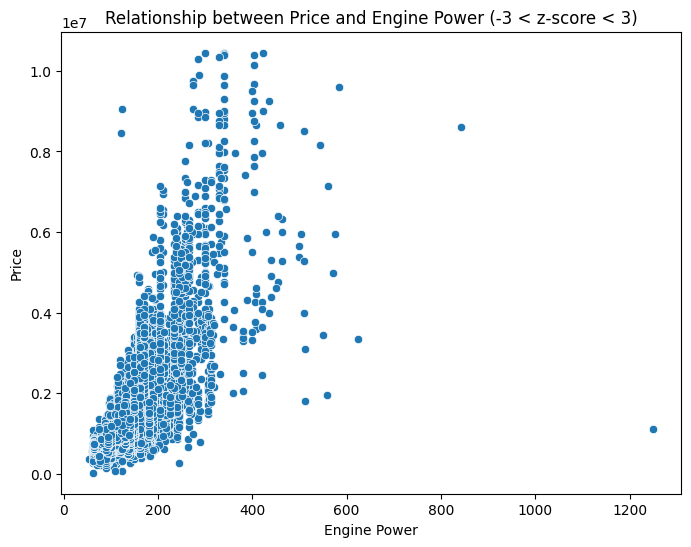

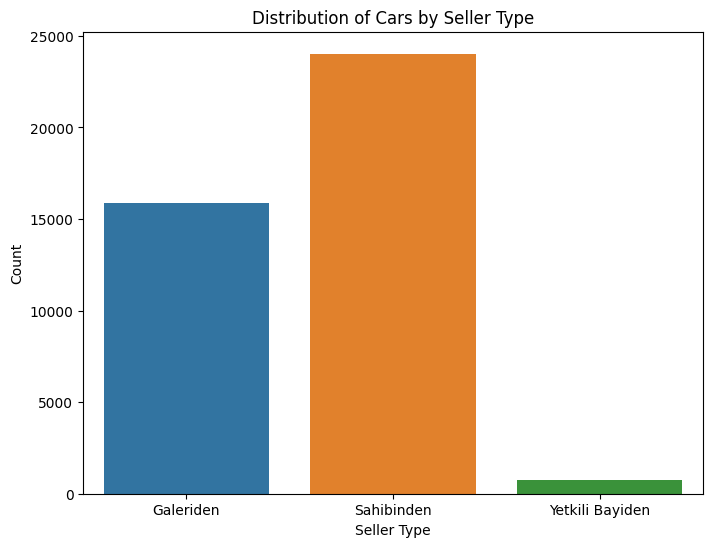

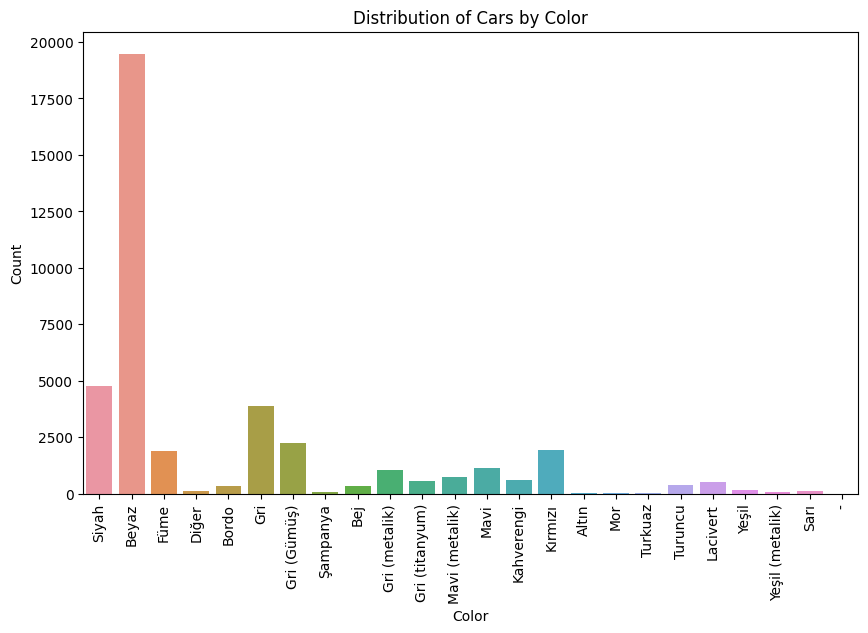

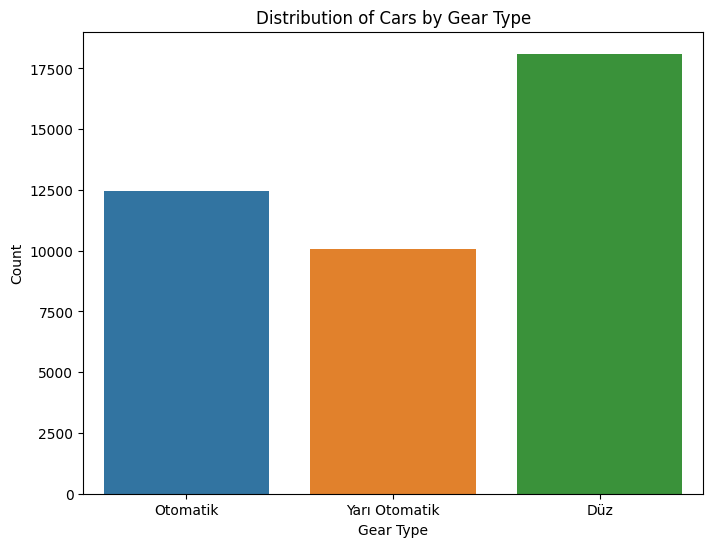

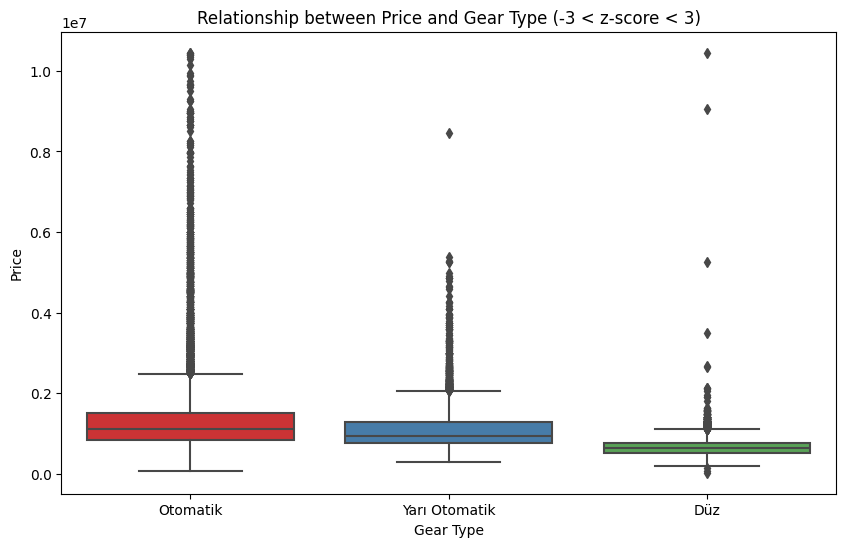

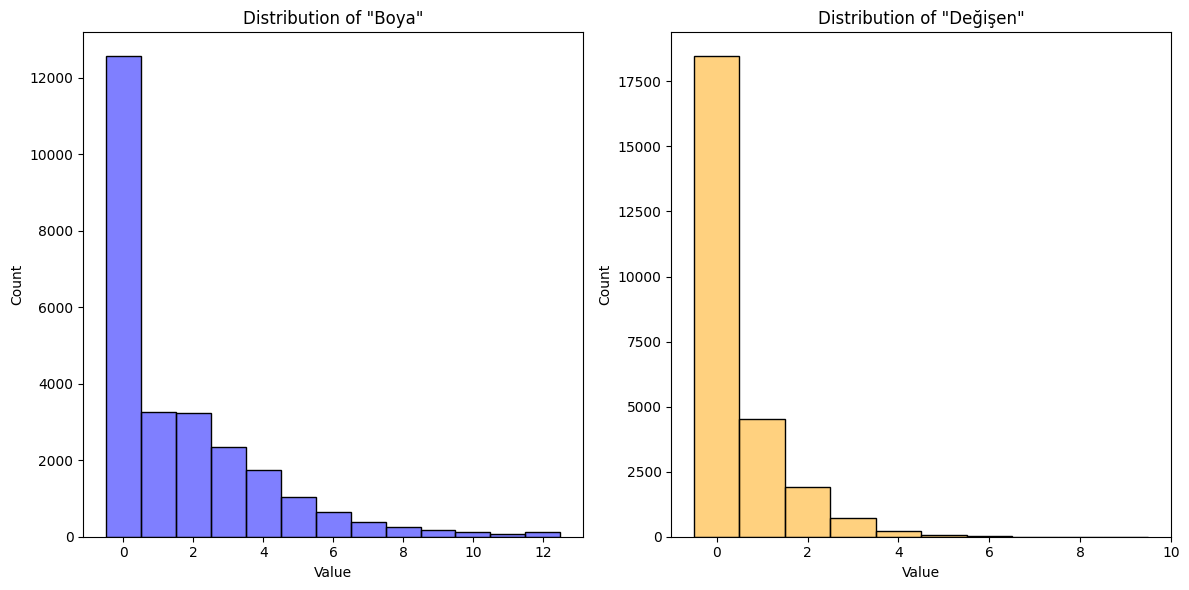

In [118]:
# Plot 1: Distribution of cars by brand
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Marka', order=df['Marka'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

# Plot 2: Distribution of cars by model year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Yıl', bins=15, kde=True)
plt.title('Distribution of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

# Plot 3: Distribution of cars by fuel type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Yakıt Tipi')
plt.title('Distribution of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

# Plot 4: Relationship between price and kilometer
mean_price = df['Fiyat'].mean()
std_price = df['Fiyat'].std()
mean_kilometer = df['Kilometre'].mean()
std_kilometer = df['Kilometre'].std()

z_threshold = 3
filtered_df = df[(abs((df['Fiyat'] - mean_price) / std_price) <= z_threshold) & 
                 (abs((df['Kilometre'] - mean_kilometer) / std_kilometer) <= z_threshold)]

# Plot the relationship between price and kilometer without outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Kilometre', y='Fiyat')
plt.title('Relationship between Price and Kilometer (-3 < z-score < 3)')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.show()

# Plot 5: Relationship between price and engine power
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Motor Gücü', y='Fiyat')
plt.title('Relationship between Price and Engine Power (-3 < z-score < 3)')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.show()


# Plot 6: Distribution of the Seller Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Kimden')
plt.title('Distribution of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()


# Plot 7: Distribution of the Colors
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Renk')
plt.title('Distribution of Cars by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot 8: Distribution of the Gear Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vites Tipi')
plt.title('Distribution of Cars by Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Count')
plt.show()

# Plot the relationship between Price and Gear Type
mean_price = df['Fiyat'].mean()
std_price = df['Fiyat'].std()

z_threshold = 3
filtered_df = df[(abs((df['Fiyat'] - mean_price) / std_price) <= z_threshold)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Vites Tipi', y='Fiyat', palette='Set1')
plt.title('Relationship between Price and Gear Type (-3 < z-score < 3)')
plt.xlabel('Gear Type')
plt.ylabel('Price')
plt.show()

# Histogram for "Boya"
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Boya', bins=2, discrete=True, color='blue', alpha=0.5)
plt.title('Distribution of "Boya"')
plt.xlabel('Value')
plt.ylabel('Count')

# Histogram for "Değişen"
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Değişen', bins=2, discrete=True, color='orange', alpha=0.5)
plt.title('Distribution of "Değişen"')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()